# Least Squares Assignment
---

The goal of this assignment is to achieve uniform lighting in a room by utilizing 10 lamps with varying power.

In [1]:
import math
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing
---

As a first step, we will initialize the lamp coordinates, as well as the illumination and power lists. List `p` contains the power of the lamps and has a shape of `10x1`. List `l` contains the illumination pattern and has a shape of `625x1` for a given room of `25x25` pixels:

In [2]:
# initialization of power of ones (10 x 1)
p_ones = np.array([1 for i in range (10)]).T
l_ones = np.array([1 for i in range (625)]).T

# initialization of lamps
lamps = [
    [4.10, 20.4, 4.0], [14.1, 21.3, 3.5], 
    [22.6, 17.1, 6.0], [5.50, 12.3, 4.0], 
    [12.2, 9.70, 4.0], [15.3, 13.8, 6.0], 
    [21.3, 10.5, 5.5], [3.90, 3.30, 5.0],
    [13.1, 4.30, 5.0], [20.3, 4.20, 4.5]
]
lamps = np.array(lamps)

Matrix `A` contains information on illumination patters. The j-th column of `A` gives the illumination pattern for lamp j, if no other lamp is active in the room. The i-th row of `A` gives the sensitivity of pixel i to the n lamp powers. Matrix `A` has, consequently, a shape of `625x10`:

In [3]:
# initialization of A matrix (10 x 625)
acc = []
for l in lamps:
    curr_row = []
    x, y, z = l[0], l[1], l[2]
    for i in range(1, 26):
        curr_col = []
        for j in range(1, 26):
            dist = math.sqrt(
                (x-i) ** 2 + (y-j) ** 2 + l[2] ** 2
            ) ** (-2)
            curr_col.append(dist)
        curr_row.append(curr_col)
    acc.append(curr_row)

fin = []
for i in range(10):
    curr = [item for sublist in acc[i] for item in sublist]
    fin.append(curr)
    
A = np.array(fin).T

## Unsolved LS - All lamps set to power 1
---

The equation that describes our problem is:

$$
    Ap = l
$$

where we set the vector `p` equal to ones:

In [4]:
# calculation of l for p_ones (625 x 1)
l_unsol = A @ p_ones

# calculate rms
rms = math.sqrt( sum ( (l_unsol - l_ones ) ** 2 ) )
print('RMS: {:.2f}'.format(rms))

RMS: 22.61


The illumination of the room and the corresponding illumination histogram are:

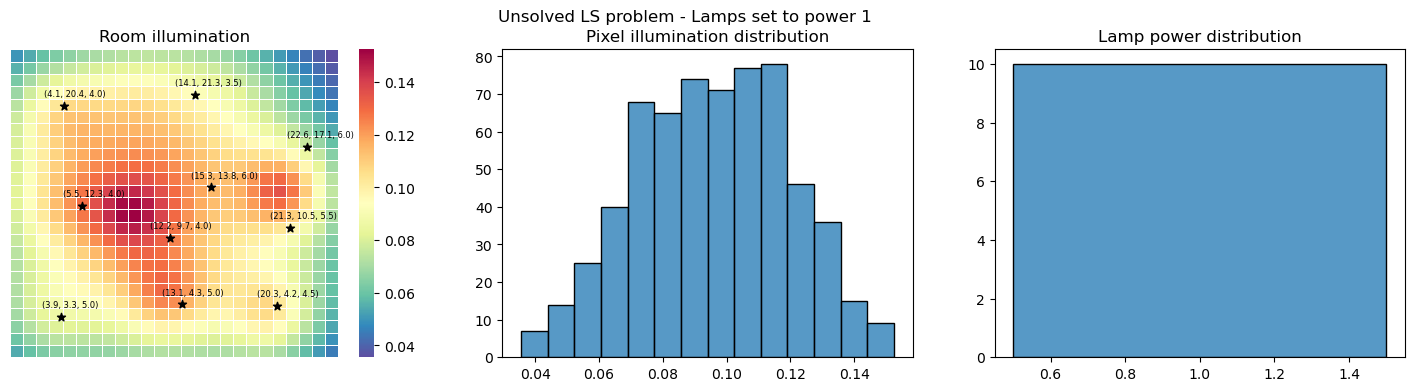

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Unsolved LS problem - Lamps set to power 1')

# heatmap
sns.heatmap(
    l_unsol.reshape(25, 25), 
    ax=axes[0],
    linewidth=0.50,
    cmap=sns.color_palette("Spectral_r", as_cmap=True),
    xticklabels=[], 
    yticklabels=[]
)

# plotting lamps coordinates
axes[0].scatter(
    lamps[:, 0], lamps[:, 1],
    marker='*', color='black'
)
axes[0].set_title('Room illumination')
axes[0].invert_yaxis()

# lamp annotation
for i in range(10):
    axes[0].text(
        lamps[i][0]-1.5, 
        lamps[i][1]+0.75,
        '({}, {}, {})'.format(
            lamps[i][0], 
            lamps[i][1], 
            lamps[i][2]
        ),
        fontdict={
            'size': 6
        }
    )

# pixel histogram
sns.histplot(ax=axes[1], x=l_unsol)
axes[1].set_title('Pixel illumination distribution')
axes[1].set(ylabel='')

# lamp histogram
sns.histplot(ax=axes[2], x=p_ones)
axes[2].set_title('Lamp power distribution')
axes[2].set(ylabel='')

plt.show()

Taking a closer look to the produced histogram we can notice how the state of illumination is far from ideal, since no pixel has an illumination of 1.

## Solving the least squares problem
---

The closed form of the solution for the LS problem is:

$$
    p = (A^TA)^{-1}A^Tl
$$

where the vector `l` is set to ones:

In [6]:
# calculating power for unfirom lighting
p_sol = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), l_ones)

# calculation of l for p_ones (625 x 1)
l_sol = A @ p_sol

# calculate rms
rms = math.sqrt( sum ( (l_sol - l_ones ) ** 2 ) )
print('RMS: {:.2f}'.format(rms))

RMS: 3.64


In [7]:
print('Lamp powers:')
for p in p_sol:
    print('{:.2f}'.format(p), end=" ")

Lamp powers:
15.25 8.67 32.12 7.65 1.67 0.39 2.83 20.60 8.95 15.22 

We notice how the RMS is significantly smaller than the previous section. The illumination of the room and the corresponding illumination histogram are:

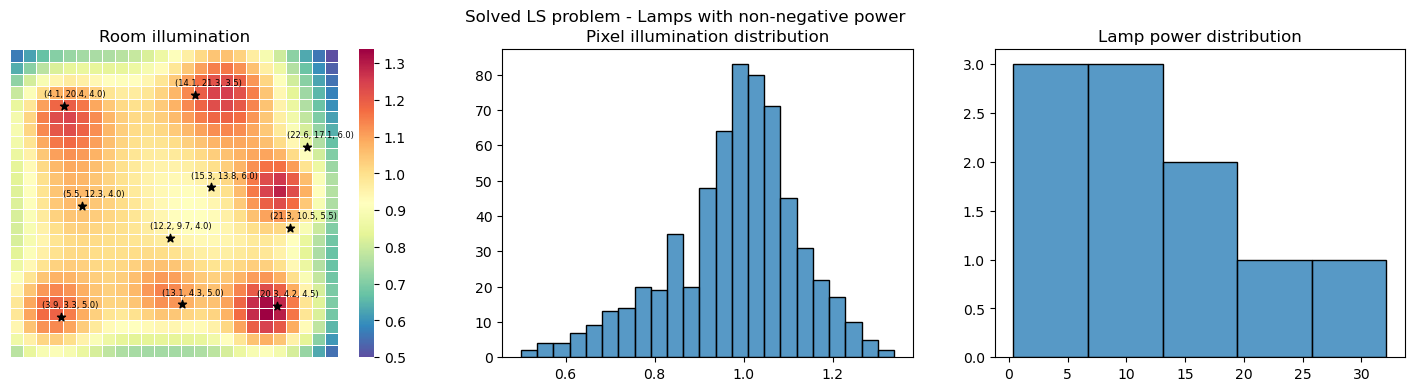

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Solved LS problem - Lamps with non-negative power')

# heatmap
sns.heatmap(
    l_sol.reshape(25, 25), 
    ax=axes[0],
    linewidth=0.50,
    cmap=sns.color_palette("Spectral_r", as_cmap=True),
    xticklabels=[], 
    yticklabels=[]
)

# plotting lamps coordinates
axes[0].scatter(
    lamps[:, 0], lamps[:, 1],
    marker='*', color='black'
)
axes[0].set_title('Room illumination')
axes[0].invert_yaxis()

# lamp annotation
for i in range(10):
    axes[0].text(
        lamps[i][0]-1.5, 
        lamps[i][1]+0.75,
        '({}, {}, {})'.format(
            lamps[i][0], 
            lamps[i][1], 
            lamps[i][2]
        ),
        fontdict={
            'size': 6
        }
    )

# pixel histogram
sns.histplot(ax=axes[1], x=l_sol)
axes[1].set_title('Pixel illumination distribution')
axes[1].set(ylabel='')

# lamp histogram
sns.histplot(ax=axes[2], x=p_sol)
axes[2].set_title('Lamp power distribution')
axes[2].set(ylabel='')

plt.show()

The histogram produces an image closer to uniformity, than in the case when all lamps were set to power of 1. Comparing the histograms of the two cases, it becomes also apparent that the solution of the LS problem is closer to the ideal state of illumnination with more pixels fluctuating around 1.

## Solving the constrained least squares problem
---

The problem statement for the problem now becomes:

$$
    argmin ||Ap - l||_2 ^2
$$

under the constraint:

$$
    \sum \limits _{i=1} ^{10} p_i=10, p_i >= 0
$$

In [9]:
def minimization_function(p):
    """
    L2 norm minimization function
    """
    return np.linalg.norm(
        np.dot(A, p) - l_ones, ord=2
    ) ** 2

cons = [{
    'type': 'eq',
    # sum of powers equal to 10 constraint
    'fun': lambda p: np.sum(p) - 10 
}]

res = scipy.optimize.minimize(
    fun=minimization_function,
    x0=p_sol, 
    method='SLSQP',
    bounds = [(0, None) for p in range(10)],
    constraints=cons
)

p_solc = res.x
print('Lamp powers:')
for p in p_solc:
    print('{:.2f}'.format(p), end=" ")

Lamp powers:
0.00 2.86 0.00 0.00 7.14 0.00 0.00 0.00 0.00 0.00 

In [10]:
# calculation of l for p_ones (625 x 1)
l_solc = A @ p_solc

# calculate rms
rms = math.sqrt( sum ( (l_solc - l_ones ) ** 2 ) )
print('RMS: {:.2f}'.format(rms))

RMS: 21.96


We can see that the minimization function reached a local minimum where indeed the sum of powers is equal to one, but only 2 lamps are active. The RMS is smaller to the initial state but far from better when compared to the solution of the unconstrained LS problem. This behaviour is expected since a constraint problem performs the same or worse than the unconstrained one.

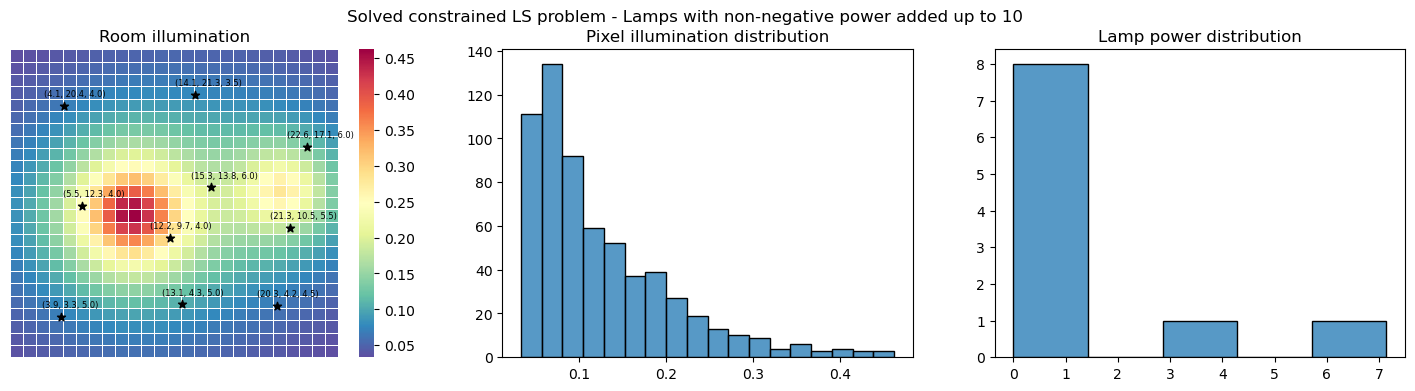

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Solved constrained LS problem - Lamps with non-negative power added up to 10')

# heatmap
sns.heatmap(
    l_solc.reshape(25, 25), 
    ax=axes[0],
    linewidth=0.50,
    cmap=sns.color_palette("Spectral_r", as_cmap=True),
    xticklabels=[], 
    yticklabels=[]
)

# plotting lamps coordinates
axes[0].scatter(
    lamps[:, 0], lamps[:, 1],
    marker='*', color='black'
)
axes[0].set_title('Room illumination')
axes[0].invert_yaxis()

# lamp annotation
for i in range(10):
    axes[0].text(
        lamps[i][0]-1.5, 
        lamps[i][1]+0.75,
        '({}, {}, {})'.format(
            lamps[i][0], 
            lamps[i][1], 
            lamps[i][2]
        ),
        fontdict={
            'size': 6
        }
    )

# pixel histogram
sns.histplot(ax=axes[1], x=l_solc)
axes[1].set_title('Pixel illumination distribution')
axes[1].set(ylabel='')

# lamp histogram
sns.histplot(ax=axes[2], x=np.round(p_solc, 2))
axes[2].set_title('Lamp power distribution')
axes[2].set(ylabel='')

plt.show()